In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import initialize_q_table, get_best_params
from RLOpt import ObjModel, train
import model_defect_recognition_data_Loader
import tensorflow as tf
import shell_model_defect_recognition

In [2]:
# Defect recognition model part

# model parameters space
params = {
            'activation_input': ['relu', 'sigmoid', 'tanh'],
            'activation_output': ['sigmoid', 'relu'],
            'optimizer': [tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop()]
}

In [3]:
# Data init
txt_path = r'C:\Users\Ruslan\Documents\TVEMA\DataSet\dataset_copy\Group5\53'
test_way = model_defect_recognition_data_Loader.TxtDataSetFilesLoading(txt_path, '.txt', np.uint8,
                                            r"C:\Users\Ruslan\Documents\TVEMA\DataSet\dataset_copy\Group5\data_info.json",
                                            True)

images, labels = test_way.load_files("defect", "all", "multiple_ch")

# Scaling
images = images / 255

# decrease dataset size because of memory limit
images = images[:8000]
labels = labels[:8000]

# Splitting
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

data = (train_images, train_labels, test_images, test_labels)

print("Train images shape: {}".format(data[0].shape))
print("Test images shape: {}".format(data[2].shape))

print("Train labels shape: {}".format(data[1].shape))
print("Test labels shape: {}".format(data[3].shape))

Found .txt files (60449) in C:\Users\Ruslan\Documents\TVEMA\DataSet\dataset_copy\Group5\53
Found .json files (1) in C:\Users\Ruslan\Documents\TVEMA\DataSet\dataset_copy\Group5\53
Created defect catalog info at: C:\Users\Ruslan\Documents\TVEMA\DataSet\dataset_copy\Group5\data_info.json
-------------------------------- loading start ---------------------------------


100%|██████████| 60449/60449 [01:54<00:00, 529.55it/s]  


Total files count in dir (.txt): 60449
Loaded images files with extension (.txt) count: 12923
Labels count: 12923
Skipped files (.txt): 47526
Train images shape: (6400, 4, 150, 128)
Test images shape: (1600, 4, 150, 128)
Train labels shape: (6400, 4)
Test labels shape: (1600, 4)


In [4]:
env = ObjModel(shell_model_defect_recognition.ModelDefectRecognition, params, data)     # environment
# Training parameters
learning_rate = 1          # Learning rate
max_steps = int(env.observation_space_n / 2)            # Max steps per episode
gamma = 0.9                 # Discounting rate

# Exploration parameters
epsilon = 1.0
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [5]:
state_space = env.observation_space_n # TODO
action_space = env.action_space_n # TODO

Qtable_init_s = initialize_q_table(state_space, action_space)

Qtable_s, episod_rewards_s, _ = train(epsilon, decay_rate, env, max_steps, Qtable_init_s, gamma, learning_rate)

params = get_best_params(Qtable_s, env, calc_acc=True)

x_train shape:  (6400, 4, 150, 128)
Epoch 1/10
200/200 [==============================] - 10s 10ms/step - loss: 0.2636 - precision_2: 0.8962
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0618 - precision_2: 0.9940
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0290 - precision_2: 0.9987
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0170 - precision_2: 0.9995
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0117 - precision_2: 0.9996
Epoch 6/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0088 - precision_2: 0.9997
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0067 - precision_2: 0.9999
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0054 - precision_2: 1.0000
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0044 - precision_2: 1.0000
Epoch 10/10
50/50 [=========

In [12]:
accuracy = np.asarray([i[1] for i in params])
the_best_result = np.argmax(accuracy)

print('the best parameters: ', params[the_best_result][0])
print('the best accuracy: ', accuracy[the_best_result])

the best parameters:  {'activation_input': 'relu', 'activation_output': 'sigmoid', 'optimizer': <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x000001CF1BD37C10>}
the best accuracy:  0.999194860458374


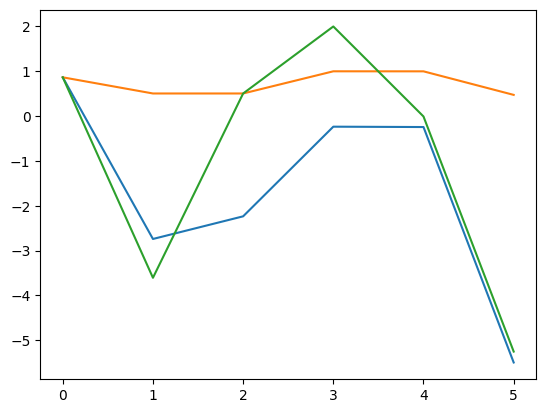

In [10]:
plt.plot(np.cumsum(episod_rewards_s[1]))
plt.plot(episod_rewards_s[0])
plt.plot(episod_rewards_s[1])